# Machine Learning Engineer Nanodegree

## Project: Predicting death events for heart failure patients using Machine Learning

*Abstract* - Having the capability to predict either one of the heart patient is going to survive or not by his/her next follow up is a huge leap in healthcare industry. We have achieved this by utilizing collected data on patients that have survived or not in the previous time and with the help of Machine Learning we have obtain the capability to predict the future of patients survival rate.

### Project Overview

The excessive changes in the lifestyles of inhabitants across the world through the last decades has moved the human societies from farming foods and active lives into fast foods and inactive lifestyles. The grouping of such lifestyle with growing cigarette consuming has improved the risk factors of cardiovascular diseases (CVDs). Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide.
Heart failure is a common event caused by CVDs. Most cardiovascular diseases can be prevented by addressing behavioral risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.
People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

### Problem Statement

Healthcare is an inevitable task to be done in human life. Cardiovascular disease is a broad category for a range of diseases that are affecting heart and blood vessels. The health care industry has a lot of data, hence this data should be used with machine learning algorithms in order to enhance the probability of reducing patients’ risk by predicting ahead if a patient is more likely to be attacked by a specific illness or not based on their lifestyle and health records data. Hence, the problem to be solved is to predict if a patient is going to decease in the following follow up session.

### Evaluation Metric

For this project, recall and precision will be used as the target output is imbalanced, using accuracy alone will not give us good idea on how well the model performed.

Precision is attempts to find what proportion of positive identifications was actually correct.

𝑃𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛 = 𝑇𝑃 ÷ 𝑇𝑃 + 𝐹𝑃

Recall is the attempt to find what proportion of actual positives was identified correctly.

𝑅𝑒𝑐𝑎𝑙𝑙=𝑇𝑃 ÷𝑇𝑃+𝐹𝑁

By using both of this metrics, it can define how well did the model perform on the validation set and this will give us sense of confidence on predictions.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import any additional functionality you may need here
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import mutual_info_classif

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings

plt.rcParams["figure.figsize"] = (15,7)
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")
print("Dataset loaded")

Dataset loaded


In [3]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### Features Dictionary 

|Name | Description |
|-----|------------- |
|age|Age of the patient |
|anaemia| Decrease of red blood cells |
|creatinine_phosphokinase | Level of the CPK enzyme in the blood |
|diabetes | If the patient has diabetes |
|high_blood_pressure | If the patient has hypertension |
|ejection_fraction | Percentage of blood leaving the heart at each contraction |
|platelets | Platelets in the blood (kiloplatelets/ mL) |
|serum_creatinine| Level of serum creatinine in the blood (mg/dL) |
|serum_sodium| Level of serum sodium in the blood |
|sex | Woman or Man |
|smoking | If the patient smokes or not |
|time | Follow up period (days) |
|DEATH_EVENT | If patient deceased or not (target variable)|

### Explanotary Data Analysis

In this section we will explore the data in order to understand relations between the features and the target variable. By performing EDA, we can get a better understanding of the dataset and how each feature will effect the target variable prediction

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


As shown above, all the features are numerical, hence we can move forward with applying mutual info classification to this dataset in order to get high level view of how each feature has effect towards the target variable. Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.[1]

In [5]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


From this statistics we can clearly see that the average age of our patients is 60 years old, almost half of the patient has decrease in red blood cells, almost half of them have diabetes, around 0.35 of patients have high blood pressure and 0.3 patients are smokers.

In [6]:
mi_scores = mutual_info_classif(data.drop(['DEATH_EVENT'], axis=1), data['DEATH_EVENT'])
mi_scores = pd.Series(mi_scores, name="MI Scores", index=data.drop(['DEATH_EVENT'], axis=1).columns)
mi_scores = mi_scores.sort_values(ascending=False)

mi_scores

time                        0.245344
ejection_fraction           0.084137
age                         0.083739
serum_creatinine            0.049439
serum_sodium                0.025472
creatinine_phosphokinase    0.016163
anaemia                     0.008459
high_blood_pressure         0.005792
smoking                     0.000000
sex                         0.000000
platelets                   0.000000
diabetes                    0.000000
Name: MI Scores, dtype: float64

Text(0.5, 1.0, 'Mutual Information Scores')

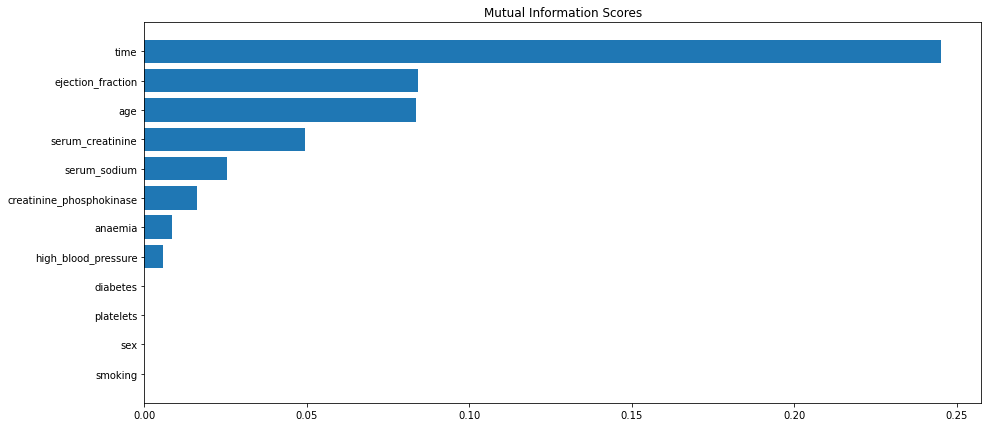

In [7]:
scores = mi_scores.sort_values(ascending=True)
width = np.arange(len(scores))
ticks = list(scores.index)
plt.barh(width, scores)
plt.yticks(width, ticks)
plt.title("Mutual Information Scores")

From the above figure we can see that time of next follow up has the highest score towards target variable followed by ejection fraction and serum creatinine. Now let's use spearman correlation to find which features are linearly correlated towards the target variable

<AxesSubplot:>

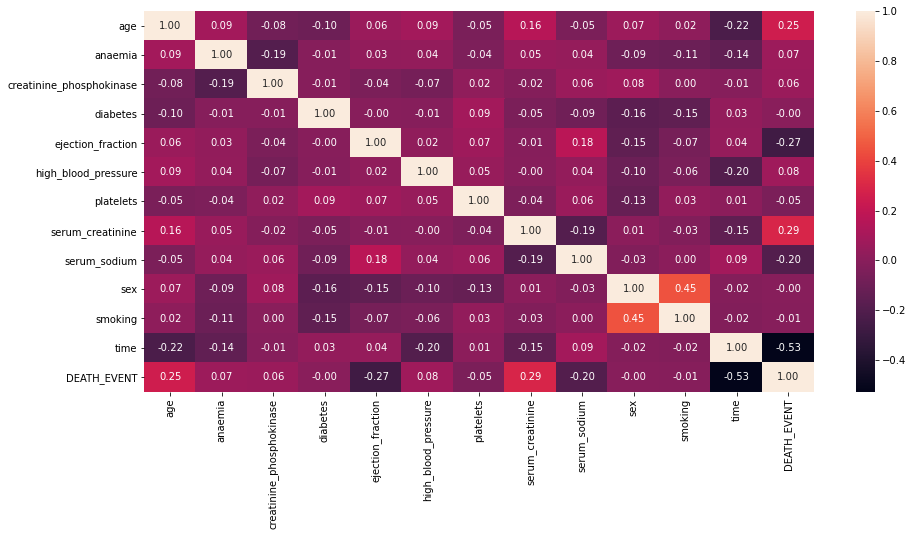

In [8]:
sns.heatmap(data.corr(), annot=True, fmt='.2f')

By looking at linear correlation it shows that time is negatively correlated with death event, hence what that would mean is as the time for next follow up is shorter, then the chances of surviving his lower, apart from that serum creatinine and age has positive correlation, and ejection_fraction has negative correlation as well. The other features have week correlation

In [9]:
data.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

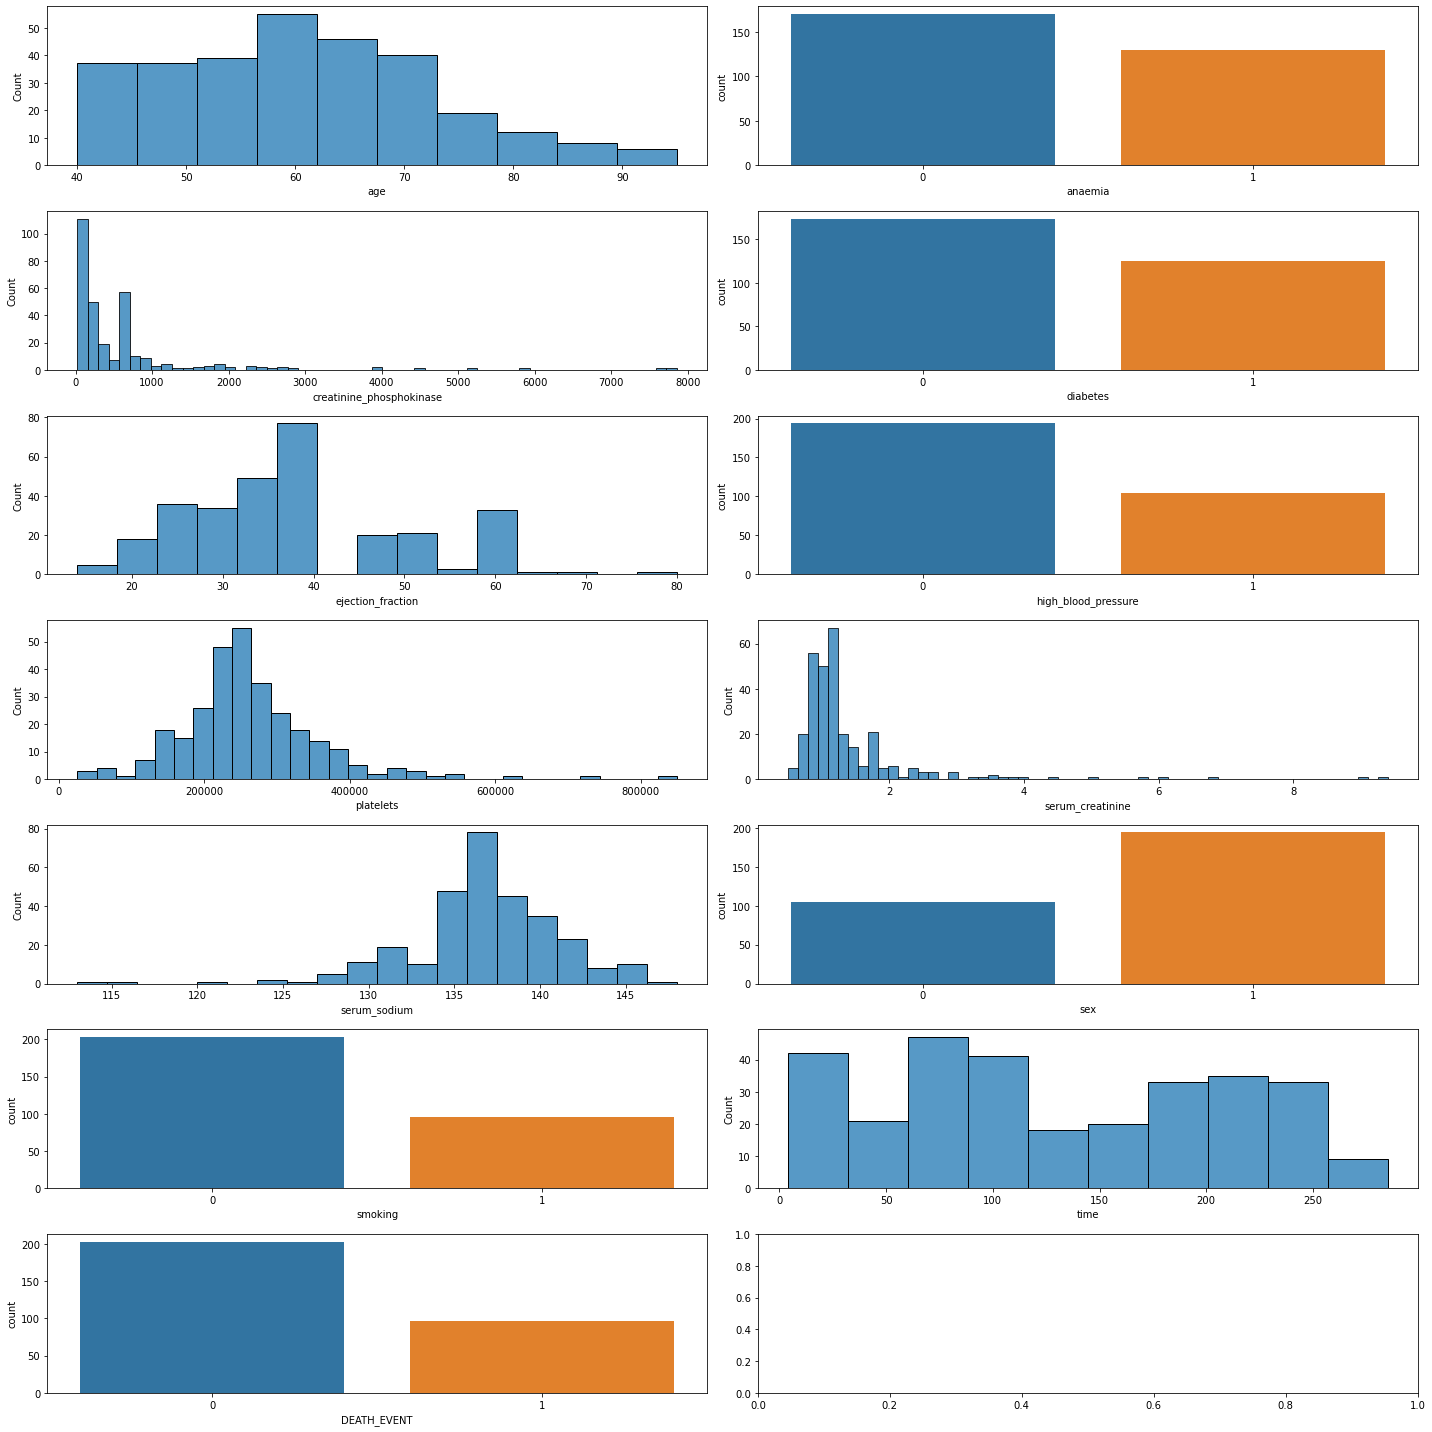

In [10]:
fig, ax = plt.subplots(7, 2, figsize=(20,20))
sns.histplot(data['age'], ax=ax[0][0])
sns.countplot(x='anaemia', data=data, ax=ax[0][1])
sns.histplot(data['creatinine_phosphokinase'], ax=ax[1][0])
sns.countplot(x='diabetes', data=data, ax=ax[1][1])
sns.histplot(data['ejection_fraction'], ax=ax[2][0])
sns.countplot(x='high_blood_pressure', data=data, ax=ax[2][1])
sns.histplot(data['platelets'], ax=ax[3][0])
sns.histplot(data['serum_creatinine'], ax=ax[3][1])
sns.histplot(data['serum_sodium'], ax=ax[4][0])
sns.countplot(x='sex', data=data, ax=ax[4][1])
sns.countplot(x='smoking', data=data, ax=ax[5][0])
sns.histplot(data['time'], ax=ax[5][1])
sns.countplot(x='DEATH_EVENT', data=data, ax=ax[6][0])
plt.tight_layout()

creatinie phosphokinase, ejection fraction, platelets, serum sodium and serum creatinine has some outliers, perhaps normalizing the data will be able to fix this problem. Other than that, this dataset target variable is not balanced as there is more data points for class 0 (not deceased) compared to 1 (deceased)

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='age'>

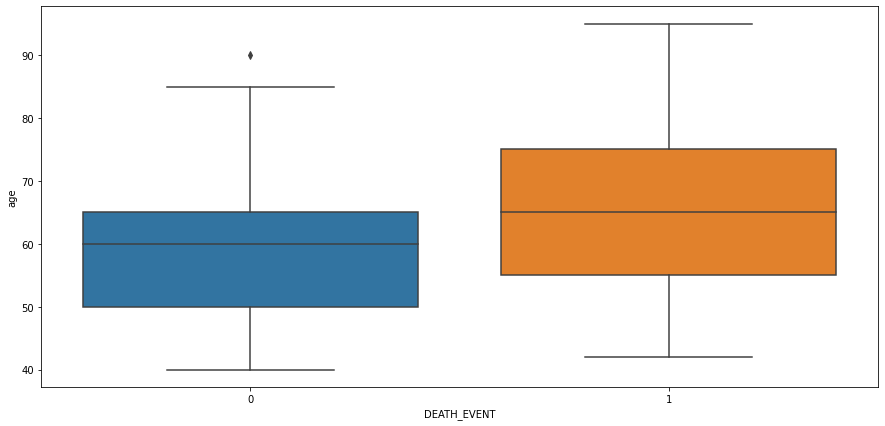

In [11]:
sns.boxplot(x='DEATH_EVENT', y='age', data=data)

We can clearly see that the median of age for patients that deceased is higher than the ones that survived

<AxesSubplot:xlabel='anaemia', ylabel='count'>

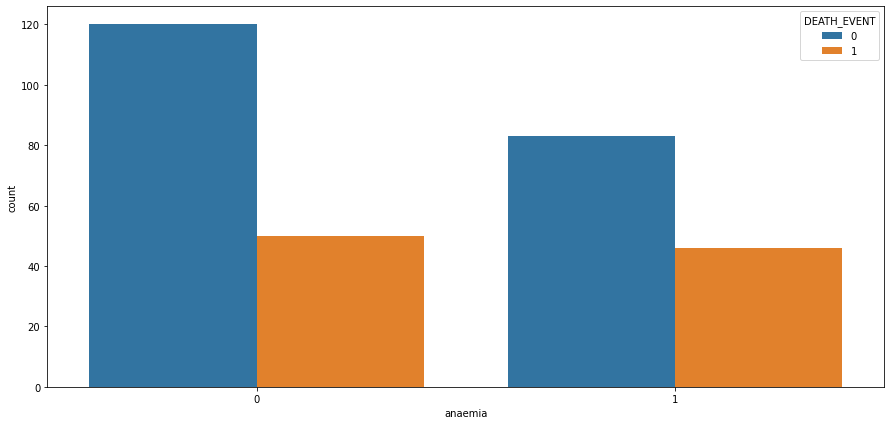

In [12]:
sns.countplot(x='anaemia', hue='DEATH_EVENT', data=data)

Patients that doesn't have anaemia have higher chances of surviving, however, this feature doesn't put much impact toward not surviving, as having anaemia or not having anaemia is giving almost the same range of probability for survival

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='creatinine_phosphokinase'>

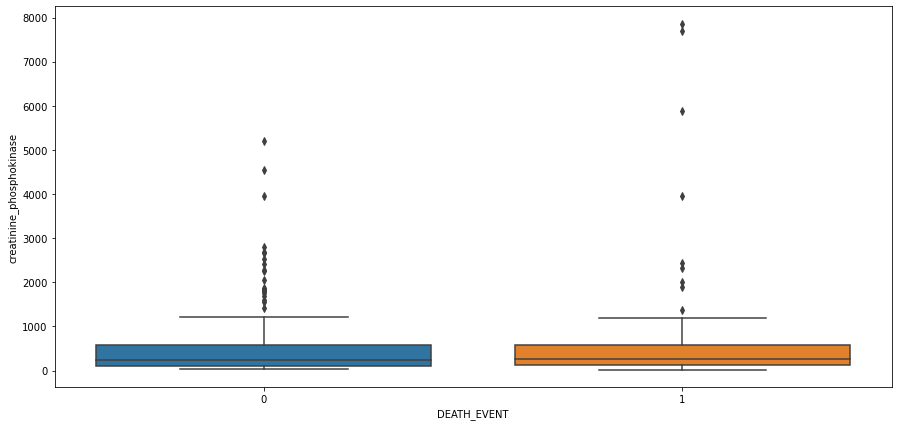

In [13]:
sns.boxplot(x='DEATH_EVENT', y='creatinine_phosphokinase', data=data)

Having higher creatinine phosphokinase rate has higher probability of not surviving for the patient

<AxesSubplot:xlabel='diabetes', ylabel='count'>

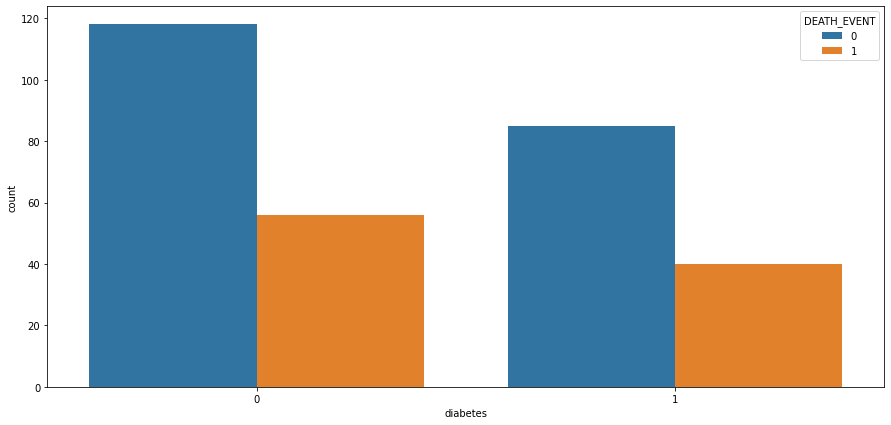

In [14]:
sns.countplot(x='diabetes', hue='DEATH_EVENT', data=data)

Since the number of patient that doesn't have diabetes is higher than those who have, then this figure does make sense as not having diabetes does give higher effect towards the rate of survival

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='ejection_fraction'>

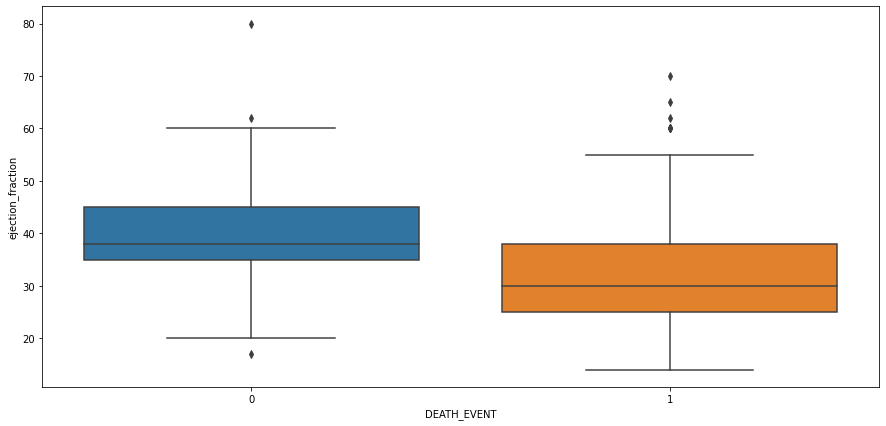

In [15]:
sns.boxplot(x='DEATH_EVENT', y='ejection_fraction', data=data)

Patients will lower ejection fraction is more likely to decease

<AxesSubplot:xlabel='high_blood_pressure', ylabel='count'>

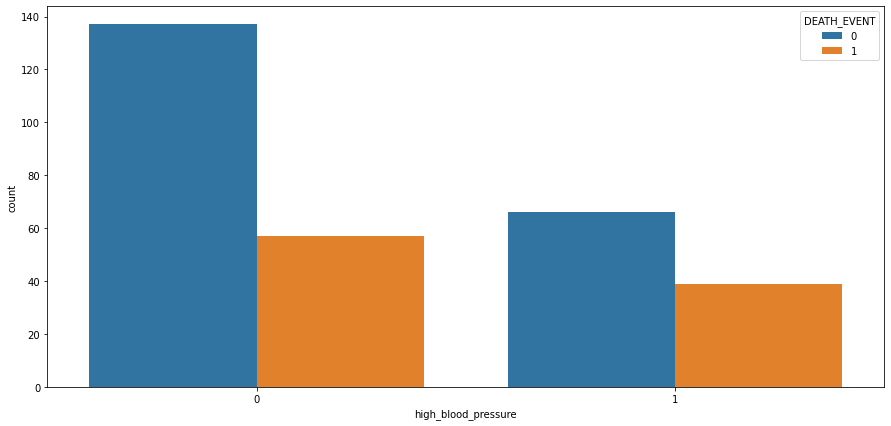

In [16]:
sns.countplot(x='high_blood_pressure', hue='DEATH_EVENT', data=data)

Not having high blood pressure does help a lot on increasing the probability for patients to survive, however it doesn't effect much on not surviving rate

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='platelets'>

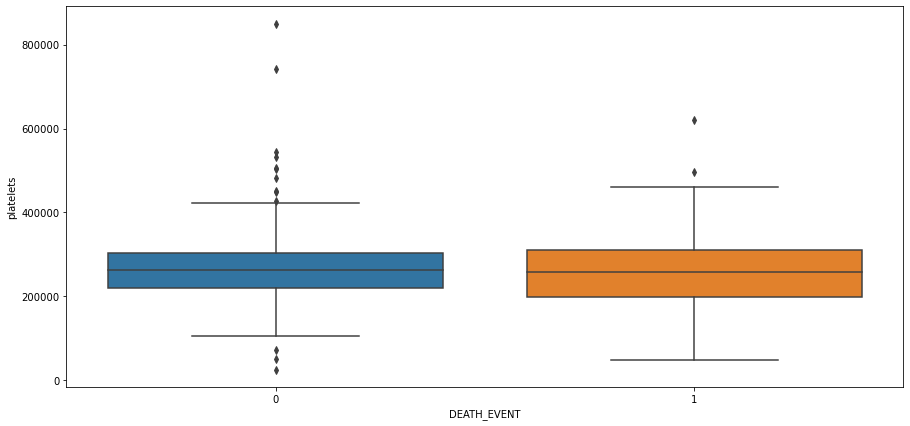

In [17]:
sns.boxplot(x='DEATH_EVENT', y='platelets', data=data)

The median is the same for survived or not survived, but generally having higher platelets does increase survival chances

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='serum_creatinine'>

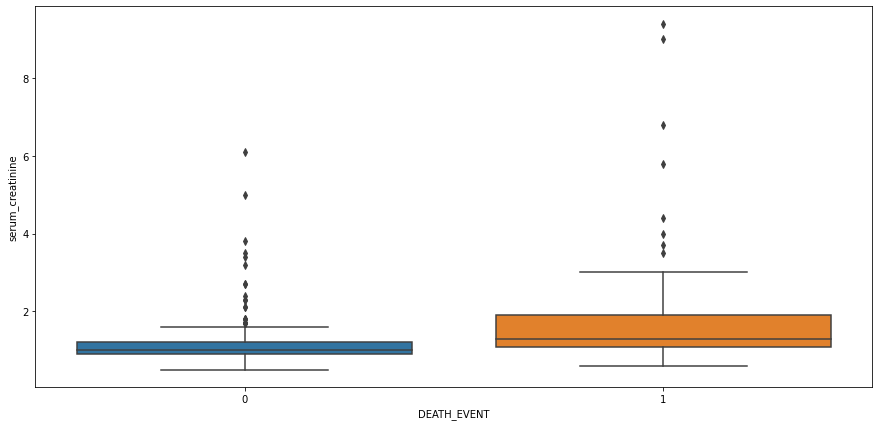

In [18]:
sns.boxplot(x='DEATH_EVENT', y='serum_creatinine', data=data)

This figure has clear view on having higher serum creatinine has higher death probability

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='serum_sodium'>

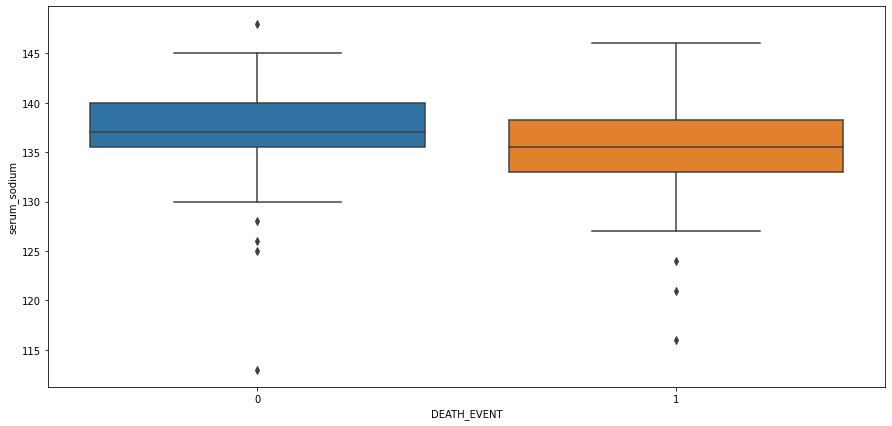

In [19]:
sns.boxplot(x='DEATH_EVENT', y='serum_sodium', data=data)

Lower serum sodium will increase the probability of not surviving

<AxesSubplot:xlabel='sex', ylabel='count'>

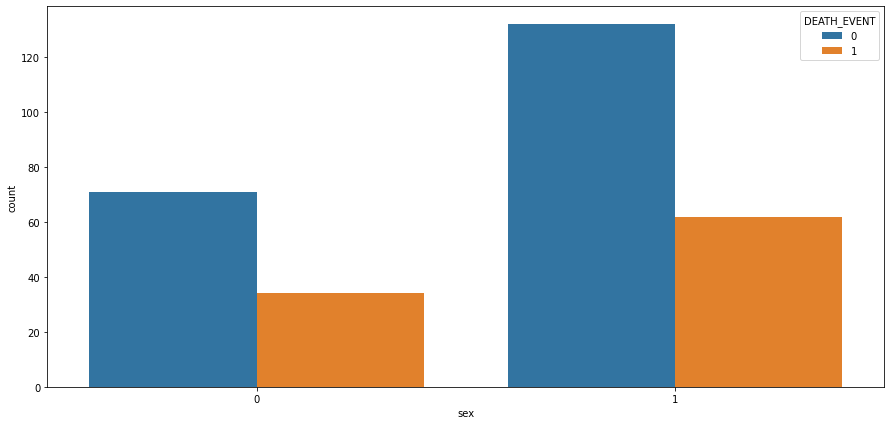

In [20]:
sns.countplot(x='sex', hue='DEATH_EVENT', data=data)

Since man are more in this dataset, hence it is obvious that the survive and not survive for man will be higher compared to woman

<AxesSubplot:xlabel='smoking', ylabel='count'>

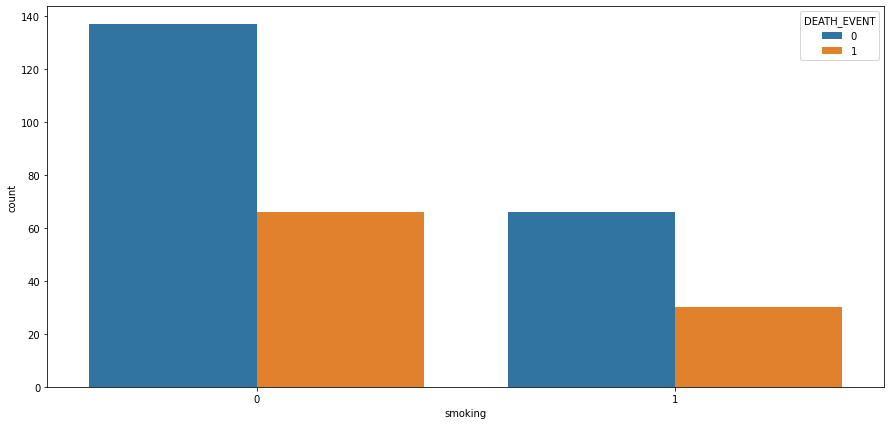

In [21]:
sns.countplot(x='smoking', hue='DEATH_EVENT', data=data)

This is expected where non smoker tends to have higher survival rate, however, being smoker doesn't put much weight on non survivors in above figure

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='time'>

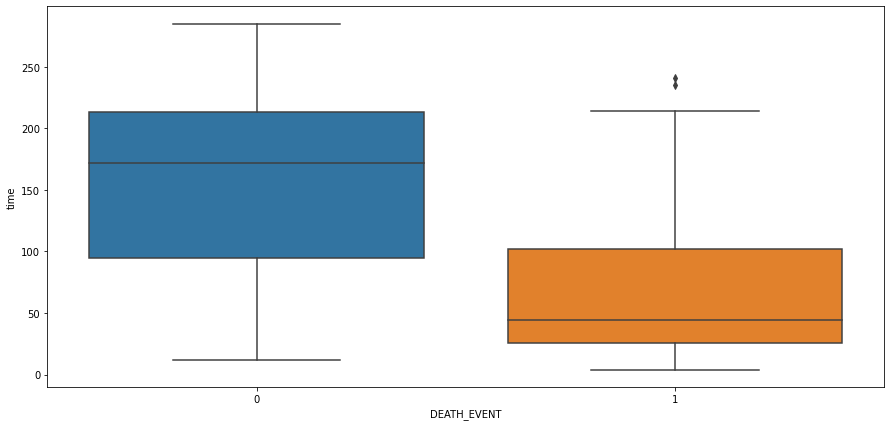

In [22]:
sns.boxplot(x='DEATH_EVENT', y='time', data=data)

Patients that have shorter follow up time is more likely to not survive, this could be because they are in critical zone and that is why they have to follow up more frequently.

### Implementation

### Algorithms and Techniques

Classification is a common task of machine learning (ML), which involves predicting a target variable taking into consideration the previous data. To reach such classification, it is necessary to create a model with the previous training data, and then use it to predict the value of the test data. This process is called supervised learning, since the data processing phase is guided toward the class variable while building the model.

Predicting either the patient will survive or not is a classification task as the output will be either one of the class 0 (not survived) and 1 (survived).

For this project, we will implement these models and find the best based on validation performance:

Support Vector Machine (SVM) - The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points. [2]

Decision Tree Classifier - Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation. [3]

Logitstic Regression - Logistic regression is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary).  Like all regression analyses, the logistic regression is a predictive analysis.  Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables. [4]

K Neighbors Classifier - KNN is an algorithm that is considered both non-parametric and an example of lazy learning. Non-parametric means that it makes no assumptions. The model is made up entirely from the data given to it rather than assuming its structure is normal. Lazy learning means that the algorithm makes no generalizations. This means that there is little training involved when using this method. Because of this, all of the training data is also used in testing when using KNN. [5]

Random Forest Classifier - A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. [6]

In the end all models will be compared based on their performance based on validation dataset, and model with the best score will be used for final product

We will start off by spliting the data into training and testing set, the dataset consist of 299 rows, hence 20% of the data will be used for testing and 80% will be used for training

In [23]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['DEATH_EVENT'], axis=1), 
                                                    data['DEATH_EVENT'],
                                                    test_size=0.2, shuffle=True, random_state=42)

In [24]:
print(len(X_train), len(X_test))

239 60


In [25]:
models = [LogisticRegression(), KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier(),
         SVC()]

In [26]:
for m in models:
    print(m.__class__.__name__)
    model = m
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(classification_report(y_test, preds))

LogisticRegression
              precision    recall  f1-score   support

           0       0.77      0.94      0.85        35
           1       0.88      0.60      0.71        25

    accuracy                           0.80        60
   macro avg       0.82      0.77      0.78        60
weighted avg       0.82      0.80      0.79        60

KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.57      0.86      0.68        35
           1       0.29      0.08      0.12        25

    accuracy                           0.53        60
   macro avg       0.43      0.47      0.40        60
weighted avg       0.45      0.53      0.45        60

DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.69      0.77      0.73        35
           1       0.62      0.52      0.57        25

    accuracy                           0.67        60
   macro avg       0.66      0.65      0.65        60
weighted av

From the exercise above we can see that Logistic Regression model performed the best, followed by Random Forest and Decision Tree. SVC is the worst of all in terms of precision and recall macro avg score.

Lets try to scale the data to have mean of 0 and std of 1 and retrain the SVC, this way we can see if the SVC model performance can increase

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
svc = SVC()
svc.fit(X_train, y_train)
preds = svc.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.67      0.94      0.79        35
           1       0.82      0.36      0.50        25

    accuracy                           0.70        60
   macro avg       0.75      0.65      0.64        60
weighted avg       0.73      0.70      0.67        60



Thus, scaling does improve the performance of SVC model, even thought it has not reached at the Logistic Regression accuracy level, but it is a lot of gain from previous version. Let see if the scaled data can improve other models as well

In [29]:
for m in models:
    print(m.__class__.__name__)
    model = m
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(classification_report(y_test, preds))

LogisticRegression
              precision    recall  f1-score   support

           0       0.68      0.97      0.80        35
           1       0.90      0.36      0.51        25

    accuracy                           0.72        60
   macro avg       0.79      0.67      0.66        60
weighted avg       0.77      0.72      0.68        60

KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.60      0.94      0.73        35
           1       0.60      0.12      0.20        25

    accuracy                           0.60        60
   macro avg       0.60      0.53      0.47        60
weighted avg       0.60      0.60      0.51        60

DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.70      0.80      0.75        35
           1       0.65      0.52      0.58        25

    accuracy                           0.68        60
   macro avg       0.68      0.66      0.66        60
weighted av

It seems like only SVC is improving, others are either stagnant or getting worst like in case of logistic regression. Another algorithm that i am going to try is light gradient boosting model by microsoft, it is combination of bagging and boosting model that has the power of gradient boosting combined with ensemble algorithm. The idea behind this experiment is to analyse if there is any other algorithm that can beat Logistic Regression performance

In [30]:
import lightgbm as lgb

X_train, X_test, y_train, y_test = train_test_split(data.drop(['DEATH_EVENT'], axis=1), 
                                                    data['DEATH_EVENT'],
                                                    test_size=0.2, shuffle=True, random_state=42)

lgbm = lgb.LGBMClassifier(learning_rate=0.001, boosting_type='goss', max_depth=0, n_estimators=100000, 
                          class_weight={0:1,1:20})
lgbm.fit(X_train, y_train)
preds = lgbm.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        35
           1       0.76      0.76      0.76        25

    accuracy                           0.80        60
   macro avg       0.79      0.79      0.79        60
weighted avg       0.80      0.80      0.80        60



As per the experiment, lightgbm has soon some promising result with some defined parameters, I would conclude that in overall this model is better than Logistic Regression as it is performing better in both metric compared to Logistic Regression which is dominating in precision but has lost in recall metric

### Result

# Model Evaluation and Performance

Table below shows each models performance on the dataset with its corresponding precision and recall (macro avg)

|Model|Precision|Recall|Precision scaled data|Recall scaled data|
|------|--------|-------|-------------------|-------------------|
|Logistic Regression|0.82|0.77|0.79|0.67|
|KNN|0.43|0.47|0.60|0.53|
|Decision Tree Classifier|0.66|0.63|0.70|0.67|
|Random Forest Classifier|0.79|0.71|0.79|0.71
|SVC|0.29|0.50|0.75|0.65|
|LightGBM|0.79|0.79|-|-|

Hence the best model to be used for this project is the LightGBM as it is giving the best performance on this dataset for both of the metrics

# Conclusion

In this project we built a classifier model that has the capability to predict either a heart patient is going to survived or not before their next follow up session. By preprocessing the data and visualizing it, we learned that not all features have direct impact towards the target variable. However, some features such as age, level of red blood cell, level of enzyme in blood, level of serum sodium in blood and days to next follow up session does play a huge part in predicting either the patient will survive or not. With this model we have the capability of predicting the death event as macro average precision of 0.79 and macro average recall of 0.79. This might not be the most ideal performance for this model but it is a good start for the project.

### References

* [1] https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html
* [2] https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47
* [3] https://scikit-learn.org/stable/modules/tree.html#tree
* [4] https://www.statisticssolutions.com/what-is-logistic-regression
* [5] https://medium.com/capital-one-tech/k-nearest-neighbors-knn-algorithm-for-machine-learning-e883219c8f26
* [6] https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html